# Tabular Data Exploration

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Disable jedi autocompleter
%config Completer.use_jedi = False

In [2]:
# Load the data
df = pd.read_csv("https://www.openml.org/data/get_csv/1595261/adult-census.csv")
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
12892,51,?,117847,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,99,United-States,<=50K
29616,38,Private,76878,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,5178,0,40,United-States,>50K
7955,41,Private,244522,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,42,United-States,>50K
36090,35,Private,187089,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,42,United-States,>50K
33624,38,Private,436361,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,75,United-States,<=50K


More info about the data can be found under http://www.openml.org/d/1590

In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 30.2 MB


In [4]:
for col in df.select_dtypes(include='object').columns:
    print(f'{col}: {df[col].nunique()}')

workclass: 9
education: 16
marital-status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
native-country: 42
class: 2


In [5]:
df.describe().iloc[1:,:]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


The goal is to predict whether a person earns over 50k a year. The column named class is our target variable. The resulting prediction problem is therefore a classification problem, while we will use the other columns as input variables for our model.

In [6]:
df['class'].value_counts(normalize='True')

 <=50K    0.760718
 >50K     0.239282
Name: class, dtype: float64

The classes are slightly imbalanced.  

<div class="alert alert-block alert-info">
Class imbalance happens often in practice and may need special techniques for machine learning. For example in a medical setting, if we are trying to predict whether patients will develop a rare disease, there will be a lot more healthy patients in the dataset.</div>

The dataset contains both numerical and categorical or object data. It is a good practice to convert object dtypes to categorical data types.

In [7]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       48842 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      48842 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  48842 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


After converting object data types to category we reduced the memory usage by over 91\%

In [8]:
categorical_cols = df.select_dtypes(include='category').columns[:-1]

In [9]:
numerical_cols = ['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']

For simplicity we have ignored the `fnlwgt` (final weight) column that was crafted by the creators of the dataset to be representative of the full census database.

## Visual Inspection of the Data

In [10]:
all_cols = numerical_cols + list(categorical_cols) + ['class']

In [11]:
df = df[all_cols]

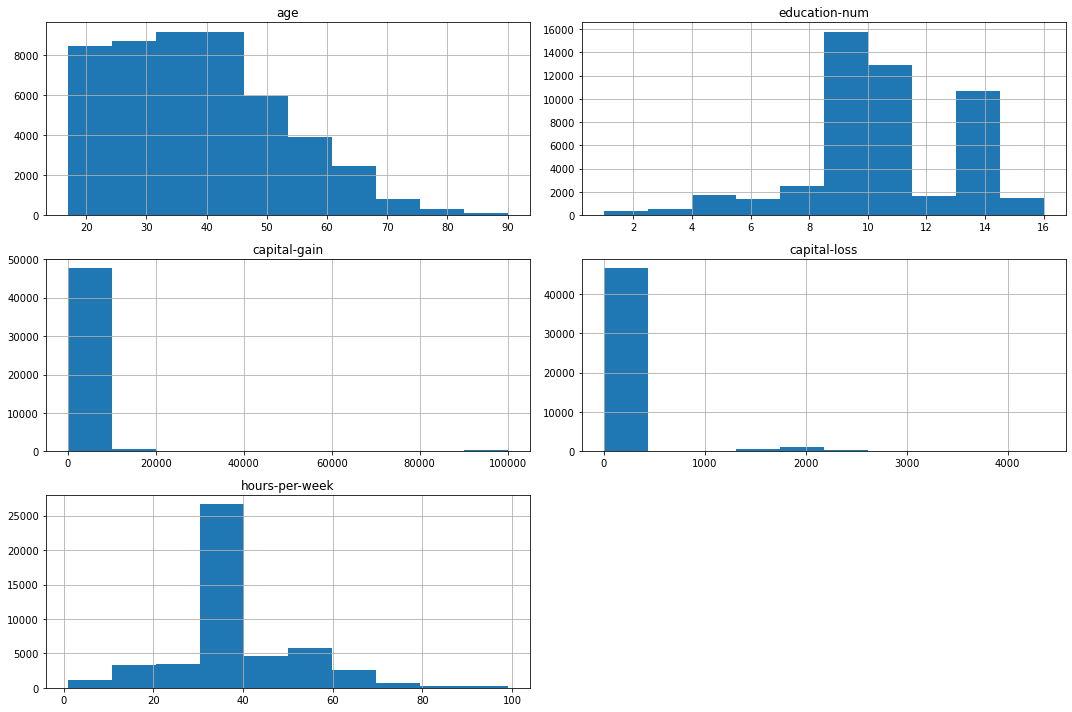

In [12]:
df.hist(figsize=(15, 10))
plt.tight_layout()

We can already make a few comments about the variables plotted above

* age: Retired people have been filtered out (hours-per-week > 0)
* education-num: peak at 10 and 13
* hours-per-week peaks at 40
* most values of capital-gein and capital-loss are close to zero

In [29]:
# categorical variables with less than 10 vlues
i = 0
for col in categorical_cols:
    if df[col].nunique() < 10:
        i+=1
        print(f'{i}) {col}:\n{df[col].value_counts(dropna=False)}')
        print('-----------------------')

1) workclass:
 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64
-----------------------
2) marital-status:
 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital-status, dtype: int64
-----------------------
3) relationship:
 Husband           19716
 Not-in-family     12583
 Own-child          7581
 Unmarried          5125
 Wife               2331
 Other-relative     1506
Name: relationship, dtype: int64
-----------------------
4) race:
 White                 41762
 Black                  4685
 Asian-Pac-Islander     1519
 Amer-Indian-Eskimo      470
 Other                   406
Name: rac

As noted above, `education-num` distribution has two clear peaks around 10 and 13. It would be reasonable to expect that it represents the number of years of eduction.  
Let's look at the relationhip between `education` and `education-num`

In [30]:
pd.crosstab(index=df['education'], columns=df['education-num'])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


This shows that `education-num` is redundant and can be removed without losing information.  

<div class="alert alert-block alert-warning">
<b>Note:</b> <br> Having redundant or highly correlated columns can be a problem for machine learning algorithms.
</div>

Another way to inspect the data is to do a pairplot and show how each variable differes according to our target: `class`.

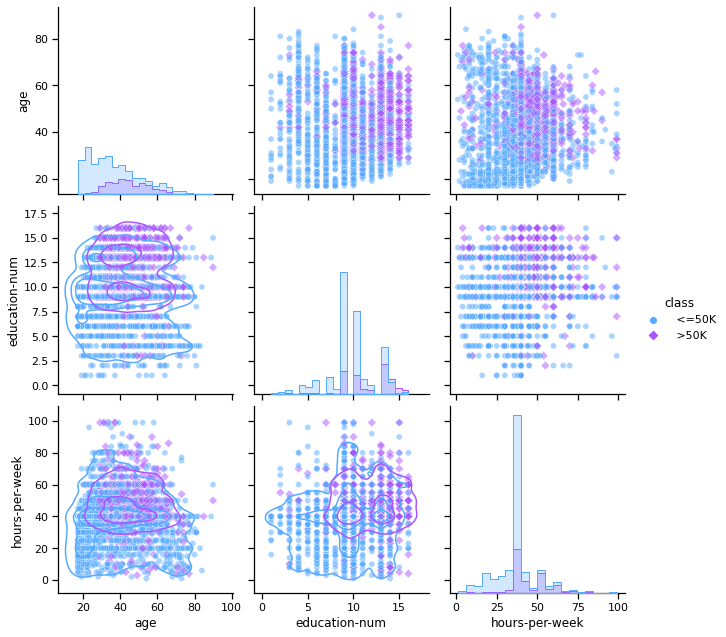

In [51]:
sns.set_context('notebook')
n_samples_to_plot = 5000
columns = ['age', 'education-num', 'hours-per-week']
g = sns.pairplot(data=df[:n_samples_to_plot], vars=columns,
                 hue='class', plot_kws={'alpha': 0.5},
                 height=3, markers=['o', 'D'], diag_kind='hist', 
                 diag_kws={'bins': 20, 'element':'step'}, palette='cool')
g.map_lower(sns.kdeplot, data=df[:n_samples_to_plot], levels=4, color='.3')
g.tight_layout();

## Creating Decision Rules by Hand

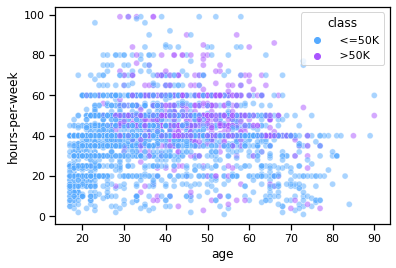

In [62]:
sns.set_context('notebook')
sns.scatterplot(
    x="age", y="hours-per-week", data=df[:n_samples_to_plot],
    hue="class", alpha=0.5, palette='cool', );

By looking at the data we could infer some hand-written rules to predict the `class`:

* if you are young (less than 25 year-old roughly), you are in the <= 50K `class`.
* if you are old (more than 70 year-old roughly), you are in the <= 50K `class`.
* if you work part-time (less than 40 hours roughly) you are in the <= 50K `class`.

These hand-written rules could work reasonably well without the need for any machine learning.  
Note however that it is not very easy to create rules for the region 40 < hours-per-week < 60 and 30 < age < 70. Machine learning can help in this region.  

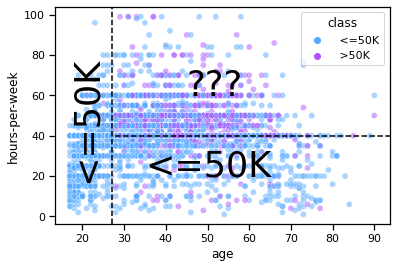

In [80]:
ax = sns.scatterplot(
    x="age", y="hours-per-week", data=df[:n_samples_to_plot],
    hue="class", alpha=0.5, palette='cool')

age_limit1 = 27
plt.axvline(x=age_limit1, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--")

plt.annotate("<=50K", (17, 20), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

<div class="alert alert-block alert-warning">
Visualization can help creating hand-written rules but is limited to 2 dimensions (maybe 3 dimensions), whereas machine learning models can build models in high-dimensional spaces.
</div>

<div class="alert alert-block alert-info">
Another thing worth mentioning in this plot: If you are young or old you tend to work less. This is a non-linear relationship between age and hours per week. Linear machine learning models can only capture linear interactions, so this may be a factor when deciding whic model to chose.</div>

In a machine-learning setting, algorithm automatically decide what should be the "rules" in order to make predictions on new data. Let's visualize which set of simple rules a decision tree would grasp using the same data.

In [69]:
def plot_tree_decision_function(tree, X, y, ax=None):
    """Plot the different decision rules found by a `DecisionTreeClassifier`.

    Parameters
    ----------
    tree : DecisionTreeClassifier instance
        The decision tree to inspect.
    X : dataframe of shape (n_samples, n_features)
        The data used to train the `tree` estimator.
    y : ndarray of shape (n_samples,)
        The target used to train the `tree` estimator.
    ax : matplotlib axis
        The matplotlib axis where to plot the different decision rules.
    """
    from scipy import ndimage

    h = 0.02
    x_min, x_max = 0, 100
    y_min, y_max = 0, 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = tree.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    faces = tree.tree_.apply(
        np.c_[xx.ravel(), yy.ravel()].astype(np.float32))
    faces = faces.reshape(xx.shape)
    border = ndimage.laplace(faces) != 0
    if ax is None:
        ax = plt.gca()
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1],
               c=np.array(['tab:blue',
                           'tab:red'])[y], s=60, alpha=0.7)
    ax.contourf(xx, yy, Z, alpha=.4, cmap='RdBu_r')
    ax.scatter(xx[border], yy[border], marker='.', s=1)
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    sns.despine(offset=10)

In [70]:
from sklearn.preprocessing import LabelEncoder

# select a subset of the data
data_subset = df[:n_samples_to_plot]
X = data_subset[["age", "hours-per-week"]]
y = LabelEncoder().fit_transform(data_subset['class'].to_numpy())

We will create a simple decision tree with a maximum of 2 rules, in order to interpret the results.

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

max_leaf_nodes = 3
tree = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=23)
tree.fit(X, y)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=23)

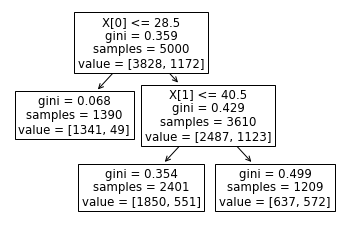

In [82]:
plot_tree(tree);

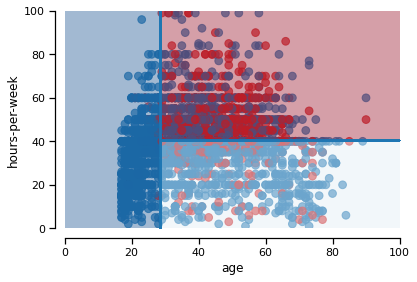

In [83]:
# plot the decision function learned by the tree
plot_tree_decision_function(tree, X, y);

By allowing only 3 leaves in the tree, we get similar rules to the ones we designed by hand.